<a href="https://colab.research.google.com/github/Yasaman-k/GTSRB/blob/main/GTSRB.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

نیازی نیست هر سری اینجا اینو ران کنی

In [ ]:

import zipfile
!unzip /content/drive/MyDrive/train.zip
!unzip /content/drive/MyDrive/test.zip

In [ ]:
# import os
# import zipfile

# local_zip = '/content/drive/MyDrive/train.zip'
# zip_ref = zipfile.ZipFile(local_zip, 'r')
# zip_ref.extractall('/content/drive/MyDrive/trainnnn')

# zip_ref.close()

In [ ]:
import os
from PIL import Image 
import numpy as np
from sklearn.model_selection import train_test_split
# from keras.utils import to_categorical
from tensorflow.keras.utils import to_categorical
from keras.models import Sequential, load_model
from keras.layers import Conv2D, MaxPool2D, Dense, Flatten, Dropout

import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf
from sklearn.metrics import accuracy_score

In [ ]:
data = pd.read_csv("/content/drive/MyDrive/Train.csv")
data.head()

,Width,Height,Roi.X1,Roi.Y1,Roi.X2,Roi.Y2,ClassId,Path
0,27,26,5,5,22,20,20,Train/20/00020_00000_00000.png
1,28,27,5,6,23,22,20,Train/20/00020_00000_00001.png
2,29,26,6,5,24,21,20,Train/20/00020_00000_00002.png
3,28,27,5,6,23,22,20,Train/20/00020_00000_00003.png
4,28,26,5,5,23,21,20,Train/20/00020_00000_00004.png


In [ ]:
# List to store image data
data = []
# List to store image labels (classes)
labels = []
# Number of classes
num_classes = 43
# Current path of the data
# print(os.getcwd())
current_path = os.getcwd()
#os.getcwd addresi k in file tosh hast ro mide 
#/home/yasaman/Desktop/projet
#/content

In [ ]:
# Iterates between 0 and 42 (43 classes)
for i in range(num_classes):
    
    # Path of each image
    # /home/yasaman/Desktop/projet/train/0
    path = os.path.join(current_path, 'train', str(i)) 

    images = os.listdir(path)
    # images = 000.png , 0001.png ,...

    
    # Iterates between each image
    # a:0000_0000_000.png
    for a in images:
        # Try to load the images
        try:
            # Open the image
            image = Image.open(path + '/' + a) # Opens and identifies the given image file.
            # image.show()
            # print(image)
            
            # Resizes the image to 30x30
            image = image.resize((30, 30))

            # Turns the image into an array
            image = np.array(image)
        

            #data , image ha toshan
            # Append the image to "data" list
            data.append(image)


            # Append the label to "labels" list
            labels.append(i)
          
            
        # If it doesn't work, shows an error message
        except:
            print('Error loading images!')


Streaming output truncated to the last 5000 lines.
Error loading images!
Error loading images!
Error loading images!
Error loading images!
Error loading images!
Error loading images!
Error loading images!
Error loading images!
Error loading images!
Error loading images!
Error loading images!
Error loading images!
Error loading images!
Error loading images!
Error loading images!
Error loading images!
Error loading images!
Error loading images!
Error loading images!
Error loading images!
Error loading images!
Error loading images!
Error loading images!
Error loading images!
Error loading images!
Error loading images!
Error loading images!
Error loading images!
Error loading images!
Error loading images!
Error loading images!
Error loading images!
Error loading images!
Error loading images!
Error loading images!
Error loading images!
Error loading images!
Error loading images!
Error loading images!
Error loading images!
Error loading images!
Error loading images!
Error loading images!
Err

In [ ]:
# Turns lists into array
data = np.array(data)
labels = np.array(labels)

#The shape of an array is the number of elements in each dimension. 
# print('DATA SHAPE: ', data.shape)
# print('LABELS SHAPE', labels.shape)

#We need to convert the list into numpy arrays for feeding to the model.

#از بین ترین ها یه مقداری واس ترین و یه مقداری واس تست جدا میشه

#data [  []  []  [] ]
#label [0,0,0,0..,1,1,1...,2,2,2,..]
#(39209,) print(labels.ndim)

# radom_state An integer
# Use a new random number generator seeded by the given integer. Using an int will produce the same results across different calls. 
# However, it may be worthwhile checking that your results are stable across a number of different distinct random seeds.
#  Popular integer random seeds are 0 and 42.

X_train, X_test, y_train, y_test = train_test_split(data, labels, test_size = 0.2, random_state=42)


# y_test=[0,1,2,4,...,42]
# print(y_test[:100]) yani 100 taye aval ro joda kon

# print(X_train.shape,'|', X_test.shape,'|',y_train.shape,'|',y_test.shape)

# # Use "to_categorical" method to convert the labels present in y_train and y_test into one-hot encoding
# #max adadi k toye araye hast 42 hast k dg mitonim 43 b bad adad bezarim
y_train = to_categorical(y_train, num_classes=43 , dtype ="int32")
y_test = to_categorical(y_test, num_classes=43 , dtype='int32')

# # print(X_train.shape) (31367, 30, 30, 3)
# # print(X_train.shape[1:]) (30, 30, 3)

# plt.imshow(X_train[0])
# # print(y_train[0])
# # print(X_train[0])

model = Sequential()

model.add(Conv2D(32, kernel_size=(5, 5), activation='relu', input_shape=X_train.shape[1:]  ))
model.add(Conv2D(32, kernel_size=(5, 5), activation='relu'))
model.add(MaxPool2D(2,2))

model.add(Dropout(0.25))

model.add(Conv2D(64, kernel_size=(3, 3), activation='relu'))
model.add(Conv2D(64, kernel_size=(3, 3), activation='relu'))
model.add(MaxPool2D(2, 2))

model.add(Dropout(0.25))

model.add(Flatten())
model.add(Dropout(0.5))
model.add(Dense(43, activation='softmax')) #laye akhar k bayad be tedade label bashe

model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'] )

# epoch=15
epoch=5
history = model.fit(X_train, y_train, batch_size=64, epochs=epoch, validation_data=(X_test, y_test))

Epoch 1/5
491/491 [==============================] - 127s 256ms/step - loss: 4.0315 - accuracy: 0.2721 - val_loss: 0.6199 - val_accuracy: 0.8526
Epoch 2/5
491/491 [==============================] - 125s 254ms/step - loss: 0.8846 - accuracy: 0.7569 - val_loss: 0.2252 - val_accuracy: 0.9421
Epoch 3/5
491/491 [==============================] - 126s 257ms/step - loss: 0.5312 - accuracy: 0.8509 - val_loss: 0.1597 - val_accuracy: 0.9577
Epoch 4/5
491/491 [==============================] - 126s 256ms/step - loss: 0.3662 - accuracy: 0.8966 - val_loss: 0.1145 - val_accuracy: 0.9721
Epoch 5/5
491/491 [==============================] - 126s 257ms/step - loss: 0.2992 - accuracy: 0.9148 - val_loss: 0.0836 - val_accuracy: 0.9805


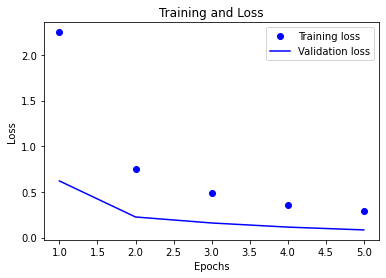

In [ ]:
history_dict = history.history
loss_values = history_dict['loss']
val_loss_values = history_dict['val_loss']
epochs = range(1, len(loss_values) + 1)
plt.plot(epochs, loss_values, 'bo', label='Training loss')
plt.plot(epochs, val_loss_values, 'b', label='Validation loss')
plt.title('Training and Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [ ]:

y_test = pd.read_csv('/content/Test.csv')
y_test.head()

# Target
labels = y_test['ClassId'].values
# Test data path
current_path = os.getcwd()
# Images path
imgs = current_path +'/' + y_test['Path'].values

# Store image data
data = []


for img in imgs:
    # Open image
    image = Image.open(img)
    # Resize to 30x30
    image = image.resize((30, 30))
    # Append in "data" list
    data.append(np.array(image))
    
# Convert "data" list to array
X_test = np.array(data)

# Make predictions
preds = model.predict_classes(X_test)

# Evaluate model
print('ACCURACY: {} %'.format(round(accuracy_score(labels, preds) * 100, 3)))

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


ACCURACY: 97.403 %


In [ ]:
classes = { 1:'Speed limit (20km/h)',
            2:'Speed limit (30km/h)', 
            3:'Speed limit (50km/h)', 
            4:'Speed limit (60km/h)', 
            5:'Speed limit (70km/h)', 
            6:'Speed limit (80km/h)', 
            7:'End of speed limit (80km/h)', 
            8:'Speed limit (100km/h)', 
            9:'Speed limit (120km/h)', 
            10:'No passing', 
            11:'No passing veh over 3.5 tons', 
            12:'Right-of-way at intersection', 
            13:'Priority road', 
            14:'Yield', 
            15:'Stop', 
            16:'No vehicles', 
            17:'Veh > 3.5 tons prohibited', 
            18:'No entry', 
            19:'General caution', 
            20:'Dangerous curve left', 
            21:'Dangerous curve right', 
            22:'Double curve', 
            23:'Bumpy road', 
            24:'Slippery road', 
            25:'Road narrows on the right', 
            26:'Road work', 
            27:'Traffic signals', 
            28:'Pedestrians', 
            29:'Children crossing', 
            30:'Bicycles crossing', 
            31:'Beware of ice/snow',
            32:'Wild animals crossing', 
            33:'End speed + passing limits', 
            34:'Turn right ahead', 
            35:'Turn left ahead', 
            36:'Ahead only', 
            37:'Go straight or right', 
            38:'Go straight or left', 
            39:'Keep right', 
            40:'Keep left', 
            41:'Roundabout mandatory', 
            42:'End of no passing', 
            43:'End no passing veh > 3.5 tons' }

In [ ]:
file_path="/content/images.jpeg"
image = Image.open(file_path)
image = image.resize((30,30))
image = np.expand_dims(image, axis=0)
image = np.array(image)
pred = model.predict_classes([image])[0]
sign = classes[pred+1]
print("------")
print(sign)
print("------")
  

------
Roundabout mandatory
------


/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '
